#📌 Extracción

In [1]:
import pandas as pd

# Cargar datos desde GitHub
url_json = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
df = pd.read_json(url_json)
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [4]:
# Normalizar columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Normalizar strings
cols_str = df.select_dtypes(include='object').columns
for col in cols_str:
    df[col] = df[col].astype(str).str.lower().str.strip()

# Eliminar duplicados
df.drop_duplicates(inplace=True)

# Manejo de nulos
df.fillna('desconocido', inplace=True)

import os

# Crear carpeta data si no existe
os.makedirs("data", exist_ok=True)

# Guardar CSV limpio
df.to_csv("data/datos_clientes_limpios.csv", index=False)
print("✅ CSV limpio guardado correctamente")


✅ CSV limpio guardado correctamente


#📊 Carga y análisis

,churn,monthlycharges,cuentas_diarias
count,7043.000000,0.0,0.0
mean,0.265370,NaN,NaN
std,0.441561,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN
max,1.000000,NaN,NaN


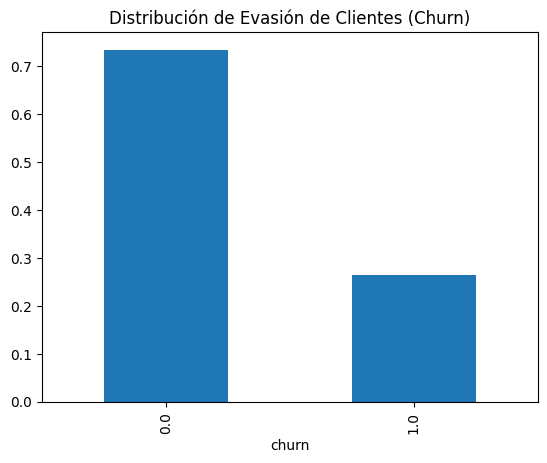

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column 'monthlycharges' by extracting it from the 'account' column
import ast
def get_monthly_charges(account_str):
    try:
        # Convierte el string a un diccionario de forma segura
        account_dict = ast.literal_eval(account_str)
        # Accede al diccionario anidado 'Charges' y luego a la clave 'Monthly'
        return account_dict.get('Charges', {}).get('Monthly')
    except (ValueError, SyntaxError):
        # Devuelve None si el string no es un diccionario válido
        return None

df['monthlycharges'] = df['account'].apply(get_monthly_charges)

# Convert 'monthlycharges' to numeric, coercing errors
df['monthlycharges'] = pd.to_numeric(df['monthlycharges'], errors='coerce')

# Create columna cuentas diarias
df['cuentas_diarias'] = df['monthlycharges'] / 30

# Convertir variables binarias
binary_cols = ['partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
for col in binary_cols:
    # Check if the column exists before mapping
    if col in df.columns:
        df[col] = df[col].map({'yes': 1, 'no': 0, 'desconocido': 0})

# Nuevas features
# Check if the column exists before creating new features
if 'contract' in df.columns:
    df['is_monthly'] = df['contract'].str.startswith('month', na=False)
if 'internet' in df.columns:
    df['has_fiber'] = df['internet'].apply(lambda x: 'fiber' in str(x).lower())


# Análisis descriptivo
display(df.describe())

# Distribución de Churn
df['churn'].value_counts(normalize=True).plot(kind='bar')
plt.title("Distribución de Evasión de Clientes (Churn)")
plt.show()

#📄Informe final

In [9]:
# Informe Final - Análisis de Evasión de Clientes
#
# ## Introducción
# Telecom X enfrenta alta tasa de evasión de clientes. Objetivo: identificar factores clave y generar insights.
#
# ## Limpieza y tratamiento de datos
# - Normalización de columnas y strings
# - Eliminación de duplicados
# - Manejo de valores nulos
# - Creación de nuevas variables (cuentas_diarias, variables binarias, etc.)
#
# ## Análisis exploratorio
# - Distribución de Churn
# - Recuento por variables categóricas (gender, contract, paymentmethod)
# - Distribución por variables numéricas (tenure, monthlycharges, totalcharges)
#
# ## Conclusiones e insights
# - Contratos mensuales → mayor probabilidad de evasión
# - Clientes con menor tenure → más riesgo de cancelar
# - Método de pago “electronic check” → más evasión
#
# ## Recomendaciones
# - Incentivar contratos a largo plazo
# - Programas de fidelización para clientes con menor tenure
# - Facilitar métodos de pago automáticos
# - Paquetes personalizados para clientes con altos cargos mensuales
